In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

In [ ]:
!ls

sample_data  spark-3.5.1-bin-hadoop3  spark-3.5.1-bin-hadoop3.tgz


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
harshitshankhdhar_imdb_dataset_of_top_1000_movies_and_tv_shows_path = kagglehub.dataset_download('harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows')

print('Data source import complete.')


Data source import complete.


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/.nfs0000000027903d7500000008
/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


In [ ]:
# Load dataset as pandas dataframe
df = spark.read.csv("/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv", inferSchema=True, header=True)

Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
https://m.media-a...,The Shawshank Red...,1994,A,142 min,Drama,9.3,Two imprisoned me...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
https://m.media-a...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crim...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
https://m.media-a...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace k...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
https://m.media-a...,The Godfather: Pa...,1974,A,202 min,"Crime, Drama",9.0,The early life an...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
https://m.media-a...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout at...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
# Display first 5 rows
df.limit(5)

Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
https://m.media-a...,The Shawshank Red...,1994,A,142 min,Drama,9.3,Two imprisoned me...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
https://m.media-a...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crim...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
https://m.media-a...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace k...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
https://m.media-a...,The Godfather: Pa...,1974,A,202 min,"Crime, Drama",9.0,The early life an...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
https://m.media-a...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout at...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
# How many movies are in the dataset?
df.count()

1000

In [ ]:
# What are the column names?
df.columns

['Poster_Link',
 'Series_Title',
 'Released_Year',
 'Certificate',
 'Runtime',
 'Genre',
 'IMDB_Rating',
 'Overview',
 'Meta_score',
 'Director',
 'Star1',
 'Star2',
 'Star3',
 'Star4',
 'No_of_Votes',
 'Gross']

In [ ]:
# Find the top 10 movies by imdb rating
from pyspark.sql.functions import desc, asc
df.sort(desc("IMDB_Rating")).select("Series_Title", "IMDB_Rating").limit(9)

Series_Title,IMDB_Rating
The Shawshank Red...,9.3
The Godfather,9.2
The Dark Knight,9.0
The Godfather: Pa...,9.0
12 Angry Men,9.0
The Lord of the R...,8.9
Pulp Fiction,8.9
Schindler's List,8.9
Inception,8.8


In [ ]:
# What is the average IMDb rating of movies in the dataset?
from pyspark.sql.functions import avg, round
df.select(round(avg("IMDB_Rating"), 3).alias("Average IMDB rating"))

Average IMDB rating
7.949


In [ ]:
# List the movies released in the year 2000.
df.select("Series_Title", "IMDB_Rating", "Released_Year").filter("Released_Year == 2000")

Series_Title,IMDB_Rating,Released_Year
Gladiator,8.5,2000
Memento,8.4,2000
Snatch,8.3,2000
Requiem for a Dream,8.3,2000
Hera Pheri,8.2,2000
Amores perros,8.1,2000
Fa yeung nin wah,8.1,2000
Dancer in the Dark,8.0,2000
Nueve reinas,7.9,2000
Almost Famous,7.9,2000


In [ ]:
# How many unique genres are there in the dataset?
from pyspark.sql.functions import split, explode, trim, col, count
df.select(explode(split(col("Genre"), ", "))).distinct().count()

21

In [ ]:
# Which genre has the most movies?
dfg = df.select(explode(split(col("Genre"), ", ")).alias("Genres"))
dfg.groupBy("Genres").count().sort(desc(col("count"))).limit(1)

Genres,count
Drama,724


In [ ]:
# Find the director with the most movies in the dataset.
df.select("Director").groupBy("Director").count().sort(desc(col("count"))).limit(1)

Director,count
Alfred Hitchcock,14


In [ ]:
# List the top 5 actors/actresses who have appeared in the most movies.
stars = df.select("Star1").union(df.select("Star2")).union(df.select("Star3")).union(df.select("Star4"))
stars.groupBy("Star1").count().sort(desc(col("count")))

Star1,count
Robert De Niro,17
Tom Hanks,14
Al Pacino,13
Clint Eastwood,12
Brad Pitt,12
Leonardo DiCaprio,11
Matt Damon,11
Christian Bale,11
James Stewart,10
Denzel Washington,9


In [ ]:
# Find the longest movie in terms of runtime.
from pyspark.sql.functions import regexp_replace
df = df.withColumn("Runtime", regexp_replace(col("Runtime"), " min", "").cast("int"))
df.sort(desc("Runtime")).select("Series_Title", "Runtime").limit(1)

Series_Title,Runtime
Gangs of Wasseypur,321


In [ ]:
# What is the average runtime of the movies?
df.select(round(avg(col("Runtime")), 2).alias("Average Runtime"))

Average Runtime
122.89


In [ ]:
# List all movies with a runtime greater than 3 hours.
df.filter("Runtime > 180").sort(desc(col("Runtime"))) # PRACTICED TO HERE 6/10/2025

Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
https://m.media-a...,Gangs of Wasseypur,2012,A,321,"Action, Comedy, C...",8.2,A clash between S...,89,Anurag Kashyap,Manoj Bajpayee,Richa Chadha,Nawazuddin Siddiqui,Tigmanshu Dhulia,82365,NULL
https://m.media-a...,Hamlet,1996,PG-13,242,Drama,7.7,"Hamlet, Prince of...",NULL,Kenneth Branagh,Kenneth Branagh,Julie Christie,Derek Jacobi,Kate Winslet,35991,"4,414,535"
https://m.media-a...,Gone with the Wind,1939,U,238,"Drama, History, R...",8.1,A manipulative wo...,97,Victor Fleming,George Cukor,Sam Wood,Clark Gable,Vivien Leigh,290074,"198,676,459"
https://m.media-a...,Once Upon a Time ...,1984,A,229,"Crime, Drama",8.4,A former Prohibit...,NULL,Sergio Leone,Robert De Niro,James Woods,Elizabeth McGovern,Treat Williams,311365,"5,321,508"
https://m.media-a...,Lawrence of Arabia,1962,U,228,"Adventure, Biogra...",8.3,The story of T.E....,100,David Lean,Peter O'Toole,Alec Guinness,Anthony Quinn,Jack Hawkins,268085,"44,824,144"
https://m.media-a...,Lagaan: Once Upon...,2001,U,224,"Adventure, Drama,...",8.1,The people of a s...,84,Ashutosh Gowariker,Aamir Khan,Raghuvir Yadav,Gracy Singh,Rachel Shelley,105036,"70,147"
https://m.media-a...,The Ten Commandments,1956,U,220,"Adventure, Drama",7.9,"Moses, an Egyptia...",NULL,Cecil B. DeMille,Charlton Heston,Yul Brynner,Anne Baxter,Edward G. Robinson,63560,"93,740,000"
https://m.media-a...,Ben-Hur,1959,U,212,"Adventure, Drama,...",8.1,After a Jewish pr...,90,William Wyler,Charlton Heston,Jack Hawkins,Stephen Boyd,Haya Harareet,219466,"74,700,000"
https://m.media-a...,"Swades: We, the P...",2004,U,210,Drama,8.2,A successful Indi...,NULL,Ashutosh Gowariker,Shah Rukh Khan,Gayatri Joshi,Kishori Ballal,Smit Sheth,83005,"1,223,240"
https://m.media-a...,The Irishman,2019,R,209,"Biography, Crime,...",7.9,An old man recall...,94,Martin Scorsese,Robert De Niro,Al Pacino,Joe Pesci,Harvey Keitel,324720,"7,000,000"


<Axes: xlabel='Released_Year', ylabel='# Released Movies'>

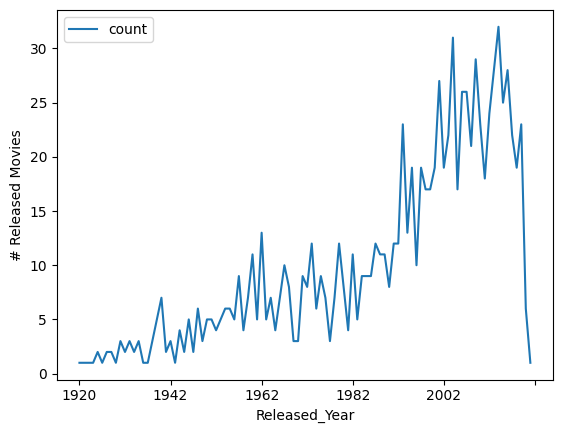

In [ ]:
# How many movies were released each year?
released_movies_year = df.groupBy("Released_Year").count().sort(asc("Released_Year")).toPandas()
released_movies_year.plot.line(x='Released_Year', y ='count', ylabel='# Released Movies')

<Axes: xlabel='IMDB Rating', ylabel='Frequency'>

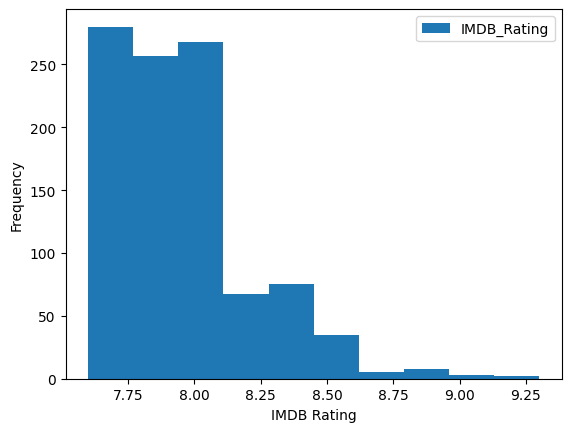

In [ ]:
# Plot the distribution of IMDb ratings using a histogram.
df_ratings = df.select("IMDB_Rating").toPandas()
df_ratings.plot.hist(xlabel='IMDB Rating')

In [ ]:
# Which movie has the most votes?
df.select("No_of_Votes", "Series_Title").sort(desc("No_of_Votes"))

No_of_Votes,Series_Title
Wotan Wilke Möhring,Das Experiment
Tony Hale,Toy Story 4
Stephen Rea,V for Vendetta
Ringo Starr,A Hard Day's Night
Reni Santoni,Dirty Harry
John Goodman,The Big Lebowski
John Buckwalter,Zelig
JB Blanc,The Count of Mont...
Geoffrey Rush,Pirates of the Ca...
Gabrielle Anwar,Scent of a Woman


In [ ]:
# Filter the dataset to only include movies with an IMDb rating greater than 8.0.
pre = df.filter(col("No_of_Votes").cast("int").isNotNull())
pre = pre.withColumn("No_of_Votes", col("No_of_Votes").cast("int"))
pre.sort(desc("No_of_Votes")).select("Series_Title", "No_of_Votes")

Series_Title,No_of_Votes
The Shawshank Red...,2343110
The Dark Knight,2303232
Inception,2067042
Fight Club,1854740
Pulp Fiction,1826188
Forrest Gump,1809221
The Matrix,1676426
The Lord of the R...,1661481
The Lord of the R...,1642758
The Godfather,1620367


In [ ]:
pre.dtypes


[('Poster_Link', 'string'),
 ('Series_Title', 'string'),
 ('Released_Year', 'string'),
 ('Certificate', 'string'),
 ('Runtime', 'string'),
 ('Genre', 'string'),
 ('IMDB_Rating', 'double'),
 ('Overview', 'string'),
 ('Meta_score', 'string'),
 ('Director', 'string'),
 ('Star1', 'string'),
 ('Star2', 'string'),
 ('Star3', 'string'),
 ('Star4', 'string'),
 ('No_of_Votes', 'int'),
 ('Gross', 'string')]